In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Reading the data locally 
data = pd.read_csv("C:/Users/HP/Downloads/data_daily.csv")
data.head(15)

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289
5,2021-01-06,7473320
6,2021-01-07,7832624
7,2021-01-08,7765028
8,2021-01-09,7385245
9,2021-01-10,7392087


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   # Date         365 non-null    object
 1   Receipt_Count  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [3]:
data.describe().astype(int)

,Receipt_Count
count,365
mean,8826566
std,782008
min,7095414
25%,8142874
50%,8799249
75%,9476970
max,10738865


In [4]:
missing_values = data.isnull().sum()
missing_values

# Date           0
Receipt_Count    0
dtype: int64

In [5]:
data['# Date'] = pd.to_datetime(data['# Date'])

data['Year'] = data['# Date'].dt.year
data['Month'] = data['# Date'].dt.month
data['Day'] = data['# Date'].dt.day

data.head(10)

,# Date,Receipt_Count,Year,Month,Day
0,2021-01-01,7564766,2021,1,1
1,2021-01-02,7455524,2021,1,2
2,2021-01-03,7095414,2021,1,3
3,2021-01-04,7666163,2021,1,4
4,2021-01-05,7771289,2021,1,5
5,2021-01-06,7473320,2021,1,6
6,2021-01-07,7832624,2021,1,7
7,2021-01-08,7765028,2021,1,8
8,2021-01-09,7385245,2021,1,9
9,2021-01-10,7392087,2021,1,10


In [6]:
data.set_index('# Date', inplace=True)
monthly_totals = data.resample('M').sum().reset_index()
monthly_totals['Month'] = monthly_totals['# Date']

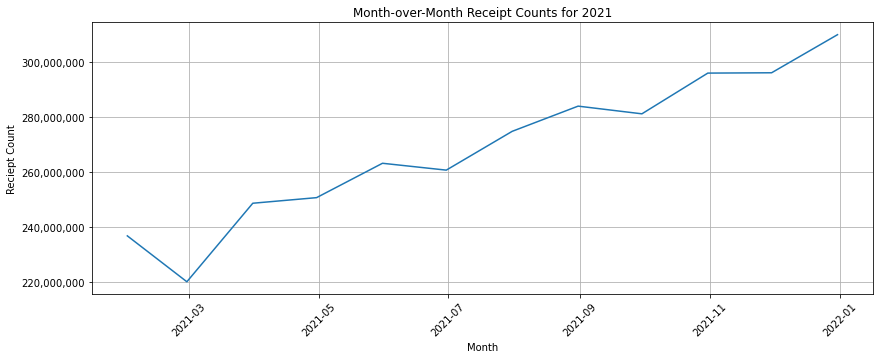

In [7]:
plt.figure(figsize=(14, 5))
plt.plot(monthly_totals['Month'], monthly_totals['Receipt_Count'], linestyle='-')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title('Month-over-Month Receipt Counts for 2021')
plt.xlabel('Month')
plt.ylabel('Reciept Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.show()

In [8]:
file_path = 'C:/Users/HP/Downloads/data_daily.csv'
data_daily = pd.read_csv(file_path)

data_daily.head(15)

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289
5,2021-01-06,7473320
6,2021-01-07,7832624
7,2021-01-08,7765028
8,2021-01-09,7385245
9,2021-01-10,7392087


In [9]:
# Renaming columns and convert 'ds' to datetime
data_daily.rename(columns={'# Date': 'ds', 'Receipt_Count': 'y'}, inplace=True)
data_daily['ds'] = pd.to_datetime(data_daily['ds'])

# Creating features for 'day of year' and 'trend'
data_daily['day_of_year'] = data_daily['ds'].dt.dayofyear
data_daily['trend'] = np.arange(len(data_daily))


In [10]:
# Preparing the features and target variable
X_train = data_daily[['day_of_year', 'trend']]
y_train = data_daily['y']
X_mean = X_train.mean()
X_std = X_train.std()

# Normalize features
X_train_normalized = (X_train - X_mean) / X_std
X_train_normalized = np.c_[np.ones(X_train_normalized.shape[0]), X_train_normalized]


In [11]:
# Making a Cost Function using Mean Squared Error
def mse_cost_function(X, y, weights):
    predictions = X.dot(weights)
    errors = predictions - y
    mse = (1 / (2 * len(y))) * np.dot(errors.T, errors)
    return mse

In [12]:
def gradient_descent(X, y, weights, learning_rate, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(weights)
        errors = predictions - y
        updates = (learning_rate / len(y)) * X.T.dot(errors)
        weights -= updates
        cost_history[i] = mse_cost_function(X, y, weights)
    return weights, cost_history


In [13]:
# Griding search for best learning rate and iterations
learning_rates = [0.001, 0.01, 0.1]
iteration_counts = [50, 100, 500, 1000, 5000]
best_cost = float('inf')
best_lr = None
best_iter = None
best_weights = None

for lr in learning_rates:
    for iters in iteration_counts:
        weights = np.random.rand(X_train_normalized.shape[1])
        trained_weights, cost_history = gradient_descent(X_train_normalized, y_train, weights, lr, iters)
        final_cost = cost_history[-1]
        if final_cost < best_cost:
            best_cost = final_cost
            best_lr = lr
            best_iter = iters
            best_weights = trained_weights

# Displaying the best learning rate and number of iterations
print(f'Best Learning Rate: {best_lr}')
print(f'Best Number of Iterations: {best_iter}')


Best Learning Rate: 0.1
Best Number of Iterations: 1000


In [14]:
# Predicting function
def predict(X, weights, X_mean, X_std):
    X_normalized = (X - X_mean) / X_std
    X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]
    return X_normalized.dot(weights)

In [15]:
# Preparing data for 2022 predictions
dates_2022 = pd.date_range(start='2022-01-01', end='2022-12-31')
X_predict = pd.DataFrame({
    'day_of_year': dates_2022.dayofyear,
    'trend': np.arange(len(data_daily), len(data_daily) + len(dates_2022))
})
dates_2022

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [16]:
# Predicting daily receipts for 2022 using the best weights
daily_predictions_2022 = predict(X_predict, best_weights, X_mean, X_std)
daily_predictions_2022



array([ 8830124.91424643,  8837244.98225984,  8844365.05027326,
        8851485.11828667,  8858605.18630009,  8865725.2543135 ,
        8872845.32232692,  8879965.39034033,  8887085.45835374,
        8894205.52636716,  8901325.59438057,  8908445.66239399,
        8915565.73040741,  8922685.79842082,  8929805.86643423,
        8936925.93444765,  8944046.00246106,  8951166.07047448,
        8958286.13848789,  8965406.20650131,  8972526.27451472,
        8979646.34252814,  8986766.41054155,  8993886.47855497,
        9001006.54656838,  9008126.6145818 ,  9015246.68259521,
        9022366.75060863,  9029486.81862204,  9036606.88663546,
        9043726.95464887,  9050847.02266229,  9057967.0906757 ,
        9065087.15868912,  9072207.22670253,  9079327.29471594,
        9086447.36272936,  9093567.43074278,  9100687.49875619,
        9107807.56676961,  9114927.63478302,  9122047.70279643,
        9129167.77080985,  9136287.83882326,  9143407.90683668,
        9150527.97485009,  9157648.04286

In [17]:
# Converting predictions to a dataframe
predicted_receipts_2022 = pd.DataFrame({
    'ds': dates_2022,
    'predicted_receipts': daily_predictions_2022
})

# Aggregating daily predictions to get monthly forecast
predicted_receipts_2022['month'] = predicted_receipts_2022['ds'].dt.to_period('M')
monthly_predictions_2022 = predicted_receipts_2022.groupby('month')['predicted_receipts'].sum().reset_index()

# Converting the 'month' column to string format for plotting
monthly_predictions_2022['month'] = monthly_predictions_2022['month'].astype(str)
predicted_receipts = monthly_predictions_2022['predicted_receipts'].astype(int)
predicted_receipts

0     277044703
1     256115102
2     290067308
3     287225160
4     303531356
5     300254885
6     316995405
7     323837790
8     319906272
9     337301839
10    332935997
11    350765888
Name: predicted_receipts, dtype: int32

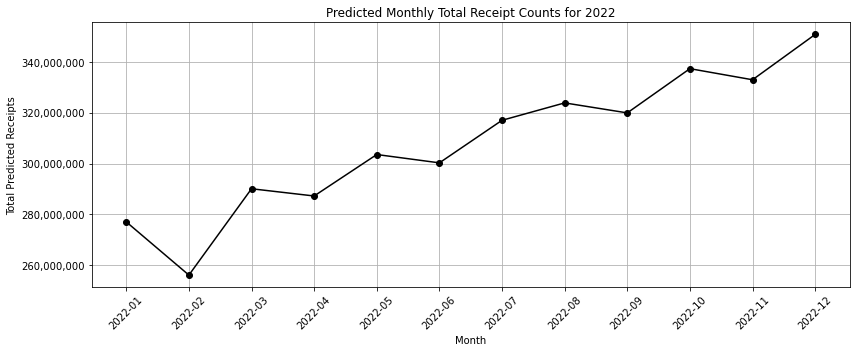

In [18]:
# Plotting the monthly total predicted receipt counts for 2022
plt.figure(figsize=(12, 5))
plt.plot(monthly_predictions_2022['month'], predicted_receipts, color='black', marker ='o')
plt.xlabel('Month')
plt.ylabel('Total Predicted Receipts')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title('Predicted Monthly Total Receipt Counts for 2022')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
data_daily['month'] = data_daily['ds'].dt.to_period('M')
monthly_totals_2021 = data_daily.groupby('month')['y'].sum().reset_index()
monthly_totals_2021['month'] = monthly_totals_2021['month'].astype(str)


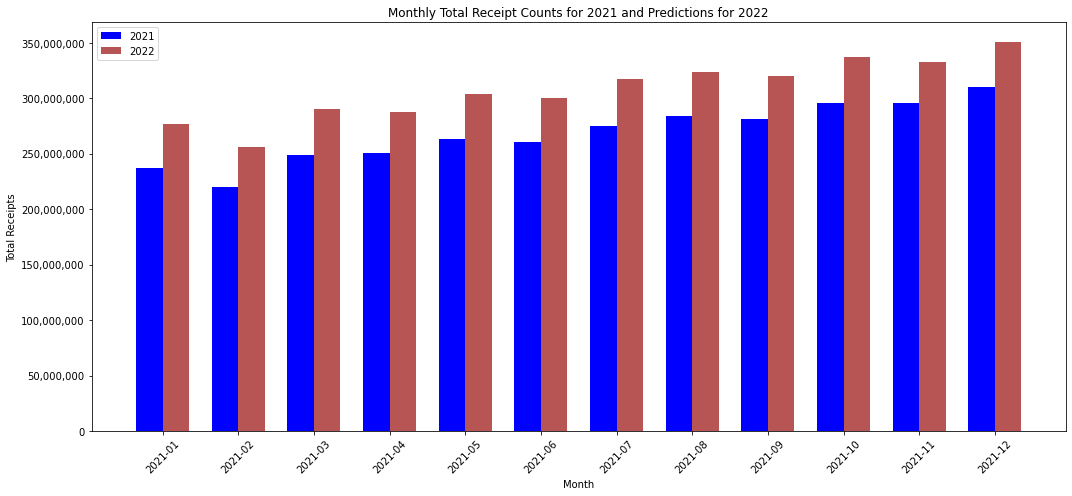

In [20]:
plt.figure(figsize=(15, 7))
n_groups = len(monthly_totals_2021)
index = np.arange(n_groups)
bar_width = 0.35
plt.bar(index, monthly_totals_2021['y'], bar_width, color='b', label='2021')
plt.bar(index + bar_width, monthly_predictions_2022['predicted_receipts'], bar_width, alpha=0.8, color='brown', label='2022')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xlabel('Month')
plt.ylabel('Total Receipts')
plt.title('Monthly Total Receipt Counts for 2021 and Predictions for 2022')
plt.xticks(index + bar_width / 2, monthly_totals_2021['month'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
monthly_predictions_2022

,month,predicted_receipts
0,2022-01,2.770447e+08
1,2022-02,2.561151e+08
2,2022-03,2.900673e+08
3,2022-04,2.872252e+08
4,2022-05,3.035314e+08
5,2022-06,3.002549e+08
6,2022-07,3.169954e+08
7,2022-08,3.238378e+08
8,2022-09,3.199063e+08
9,2022-10,3.373018e+08


In [22]:
np.save('best_weights.npy', best_weights)
np.save('X_mean.npy', X_mean.values)
np.save('X_std.npy', X_std.values)

In [23]:
monthly_predictions_2022.to_csv('monthly_predictions_2022.csv', index=False)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred = predict(X_train, best_weights, X_mean, X_std)
r2 = r2_score(y_train, y_train_pred)
print(f'R-squared: {r2:.2f}')

R-squared: 0.92
